### 1번.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
PRP                    1.000000
ERP                    0.966472
MMAX                   0.863004
MMIN                   0.794931
CACH                   0.662641
                         ...   
mname_v8655            0.002430
mname_as/6650          0.002324
mname_50-850-ii        0.001460
mname_as/7000-n        0.000269
mname_cyber:170/835    0.000163
Name: PRP, L

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


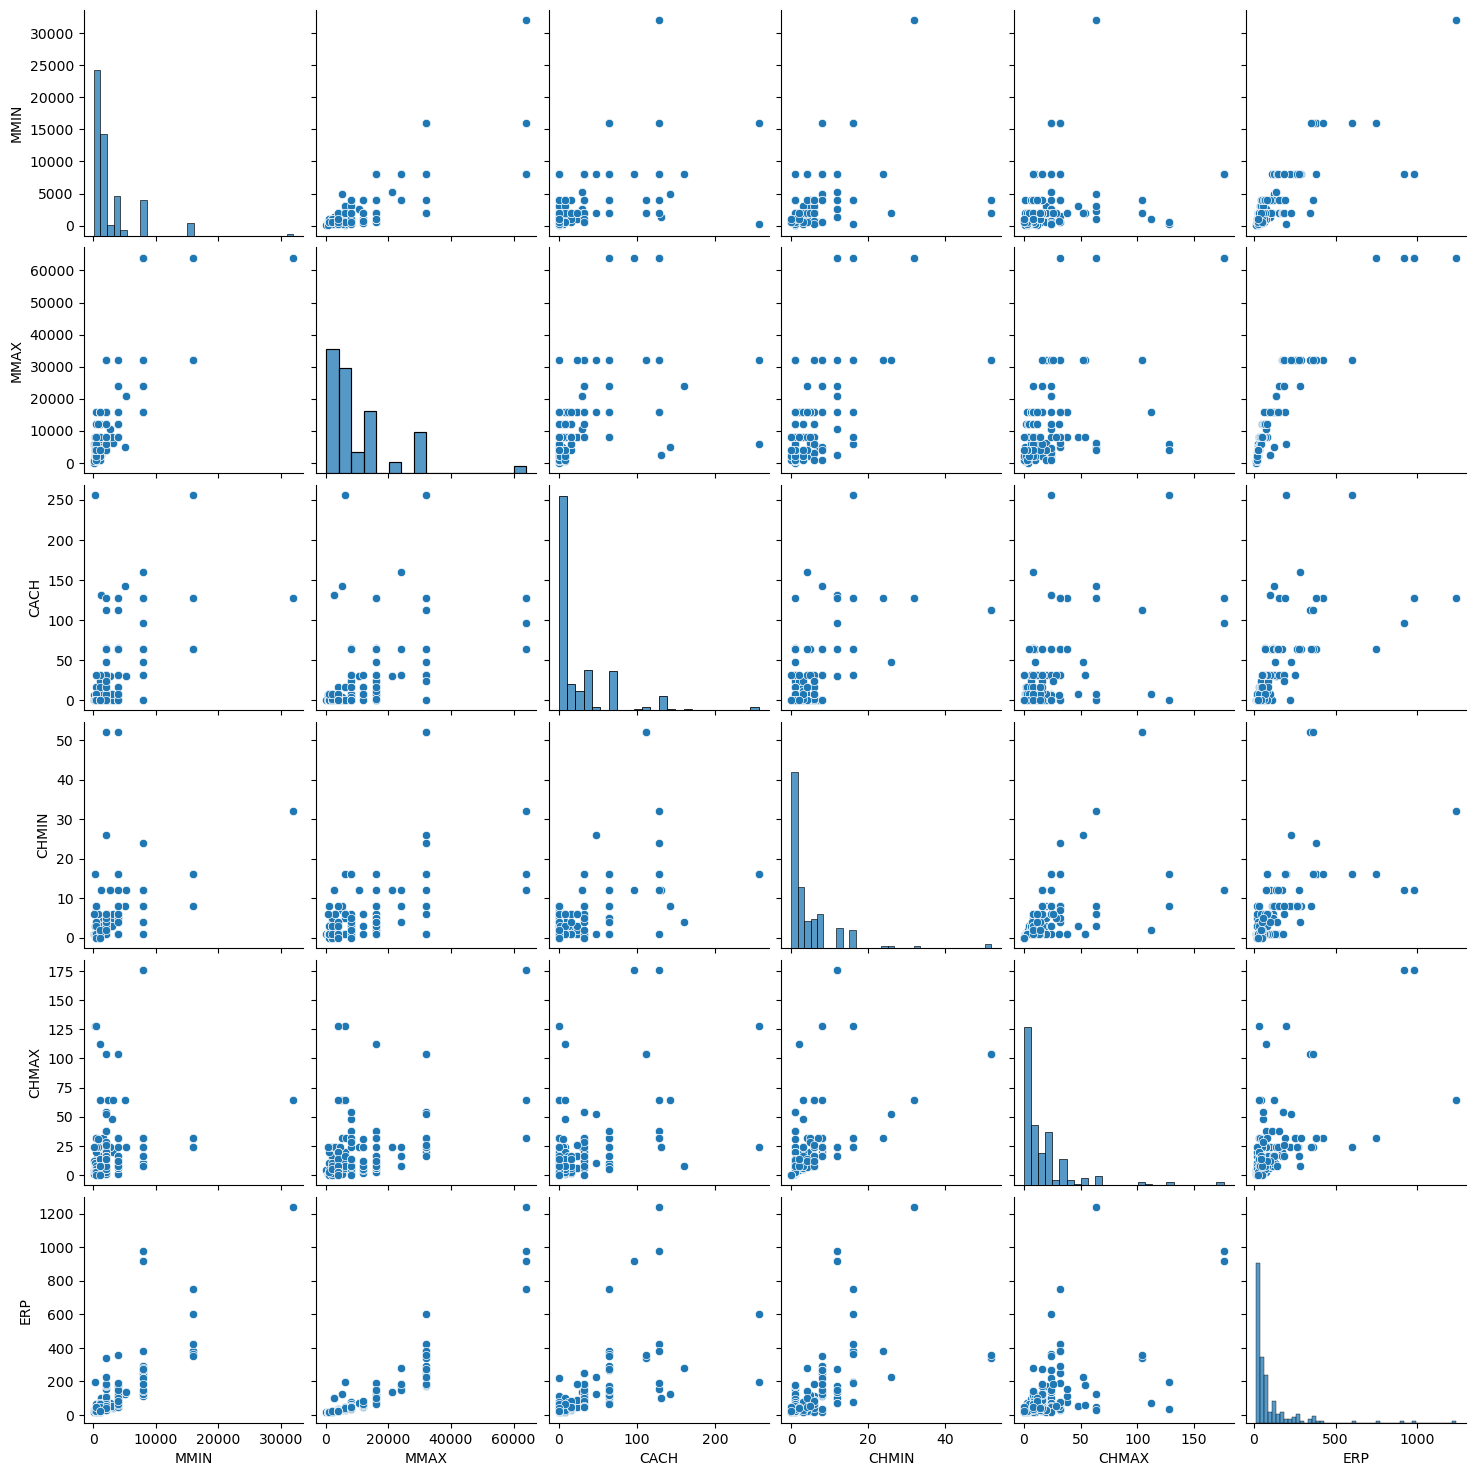

교차검증 결과: 2546.80847859058


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


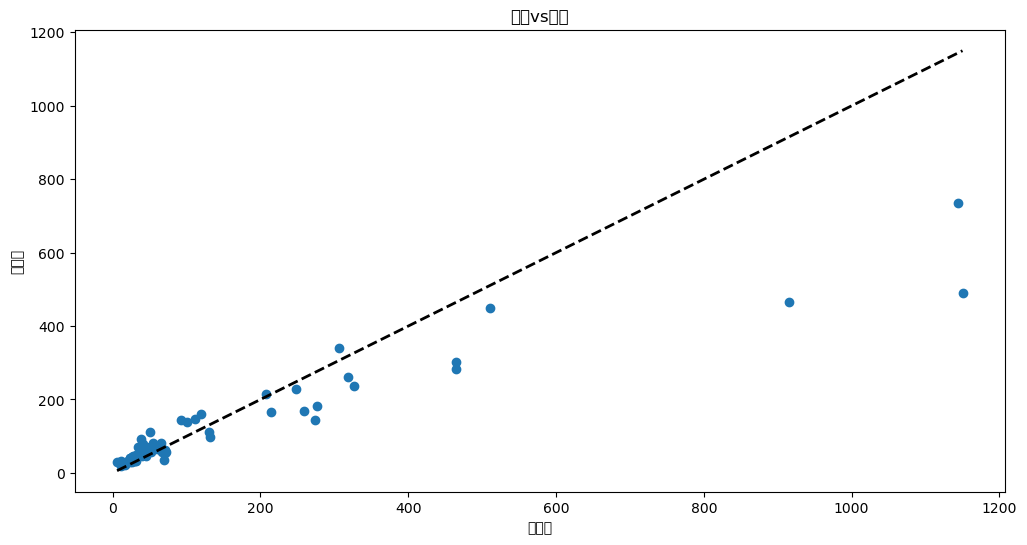

<Axes: xlabel='PRP', ylabel='Count'>

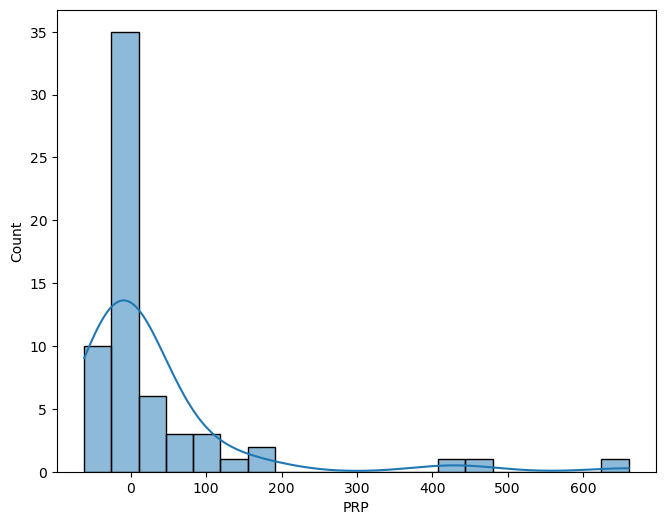

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import matplotlib.pyplot as plt
#로드,탐색
modelset=pd.read_csv("machine.data_update.csv")
modelset.info()
modelset.dropna(inplace = True)
#전처리
dum=pd.get_dummies(modelset.VendorName,prefix='vname',dtype=float)
modelset=pd.concat([modelset.drop("VendorName",axis=1),dum],axis=1)

dum=pd.get_dummies(modelset["ModelName"],prefix='mname',dtype=float)
modelset=pd.concat([modelset.drop("ModelName",axis=1),dum],axis=1)
modelset.head()

rela=modelset.corr()["PRP"]
rela=np.abs(rela)
print(rela.sort_values(ascending=False))

#print(rela.MYCT)
num_feat=['MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX','ERP']

sns.pairplot(modelset[num_feat])
plt.show()

#테스트 훈련데이터 나누기
x=modelset.drop(columns=["PRP"])
y=modelset["PRP"]
x.shape,y.shape


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

#훈련
model=LinearRegression()
model.fit(x_train_sc,y_train)

cvmse=cross_val_score(model,x_train_sc,y_train,cv=5,scoring="neg_mean_squared_error")
cvmse=-cvmse.mean()
print("교차검증 결과:",cvmse)

#겁증
y_test_pred=model.predict(x_test_sc)

#시각화
plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제vs예측')
plt.show()


plt.figure(figsize=(17, 6))
plt.subplot(1,2,1)
resi=y_test-y_test_pred
sns.histplot(resi,bins=20,kde=True)


### 2번.

In [60]:
cvmse=cross_val_score(model,x_train,y_train,cv=5,scoring="neg_mean_squared_error")
cvmse=-cvmse.mean()

cvmae=cross_val_score(model,x_train,y_train,cv=5,scoring="neg_mean_absolute_error")
cvmae=-cvmae.mean()

cvr2=cross_val_score(model,x_train,y_train,cv=5,scoring="r2")
cvr2=cvr2.mean()
print(f"교차검증 결과- mse:{cvmse},mae:{cvmae},r2:{cvr2}")

#겁증
y_pred=model.predict(x_train_sc)

r2_train=r2_score(y_train,y_pred)
mse_train=mean_squared_error(y_train,y_pred)
mae_train=mean_absolute_error(y_train,y_pred)

print(f"훈련데이터 검증- r2:{r2_train},mse:{mse_train},mae:{mae_train}")

y_test_pred=model.predict(x_test_sc)


r2_test=r2_score(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
score=model.score(x_train_sc,y_train)
print(f"테스트 데이터 검증-r2:{r2_test},mse:{mse_test},mae:{mae_test},스코어:{score}")

df=pd.DataFrame({'Model':['Linear Regression','Linear Regression','Linear Regression'],'Data':['Train','Test','Cross Validation'],
                 'MSE':[mse_train,mse_test,cvmse],'MAE':[mae_train,mae_test,cvmae],
                 'R^2':[r2_train,r2_test,cvr2]})
print(df)
df.to_csv('model_result.csv',index=False)



교차검증 결과- mse:3171.78146895885,mae:30.708239104233986,r2:0.7000356757368547
훈련데이터 검증- r2:0.9329927675202943,mse:1641.5310001550733,mae:24.442695498734405
테스트 데이터 검증-r2:0.9352616245328071,mse:1850.745114449238,mae:23.545204839268912,스코어:0.9329927675202943
               Model              Data          MSE        MAE       R^2
0  Linear Regression             Train  1641.531000  24.442695  0.932993
1  Linear Regression              Test  1850.745114  23.545205  0.935262
2  Linear Regression  Cross Validation  3171.781469  30.708239  0.700036


### 3번.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
PRP                    1.000000
ERP                    0.966472
MMAX                   0.863004
MMIN                   0.794931
CACH                   0.662641
                         ...   
mname_v8655            0.002430
mname_as/6650          0.002324
mname_50-850-ii        0.001460
mname_as/7000-n        0.000269
mname_cyber:170/835    0.000163
Name: PRP, L

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


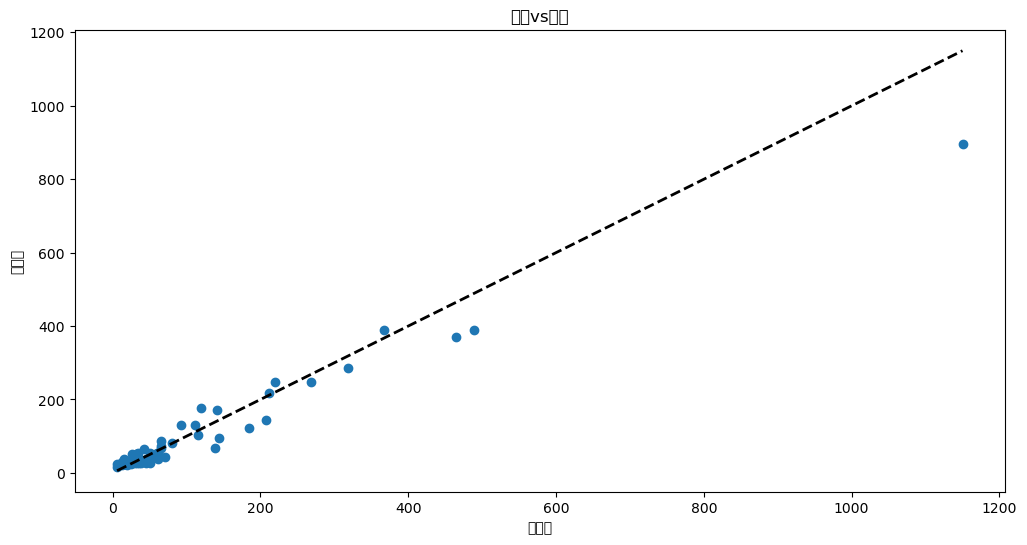

  feature        VIF
0     ERP  11.058106
1    MMAX   5.079564
2    MMIN   4.965392
3    CACH   1.891776
4   CHMIN   1.981559
5   CHMAX   1.985281


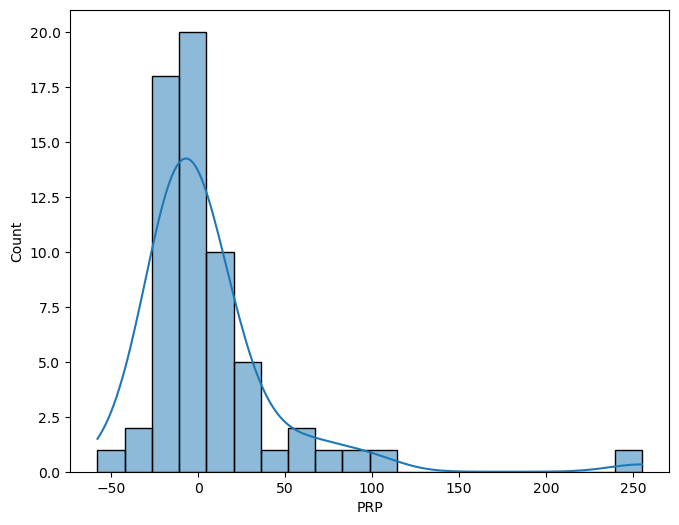

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
#로드,탐색
modelset=pd.read_csv("machine.data_update.csv")
modelset.info()
modelset.dropna(inplace = True)
#전처리
dum=pd.get_dummies(modelset.VendorName,prefix='vname',dtype=float)
modelset=pd.concat([modelset.drop("VendorName",axis=1),dum],axis=1)

dum=pd.get_dummies(modelset["ModelName"],prefix='mname',dtype=float)
modelset=pd.concat([modelset.drop("ModelName",axis=1),dum],axis=1)
modelset.head()

rela=modelset.corr()["PRP"]
rela=np.abs(rela)
print(rela.sort_values(ascending=False))

#print(rela.MYCT)
num_feat=['ERP','MMAX','MMIN','CACH','CHMIN','CHMAX']
#', 
# sns.pairplot(modelset[num_feat])
# plt.show()

#테스트 훈련데이터 나누기
x=modelset[num_feat]
y=modelset["PRP"]
x.shape,y.shape


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

#훈련
model=LinearRegression()
model.fit(x_train_sc,y_train)

cvmse=cross_val_score(model,x_train_sc,y_train,cv=5,scoring="neg_mean_squared_error")
cvmse=-cvmse.mean()
print("교차검증 결과:",cvmse)

#겁증
y_test_pred=model.predict(x_test_sc)

#시각화
plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제vs예측')
plt.show()


plt.figure(figsize=(17, 6))
plt.subplot(1,2,1)
resi=y_test-y_test_pred
sns.histplot(resi,bins=20,kde=True)
x_train_df = pd.DataFrame(x_train_sc, columns=num_feat)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_df.values, i) for i in range(len(x_train_df.columns))]

print(vif_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
PRP                    1.000000
ERP                    0.966472
MMAX                   0.863004
MMIN                   0.794931
CACH                   0.662641
                         ...   
mname_v8655            0.002430
mname_as/6650          0.002324
mname_50-850-ii        0.001460
mname_as/7000-n        0.000269
mname_cyber:170/835    0.000163
Name: PRP, L

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


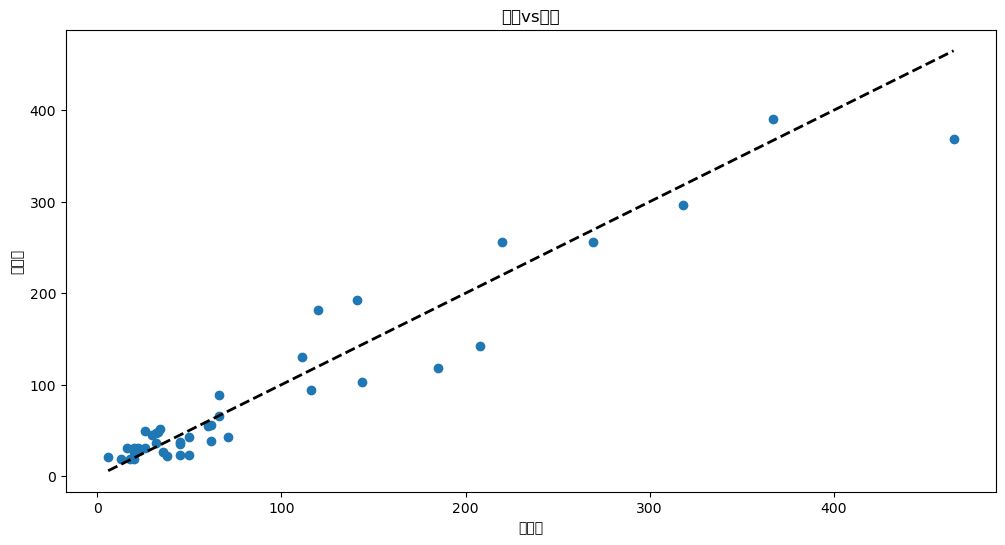

<Axes: xlabel='PRP', ylabel='Count'>

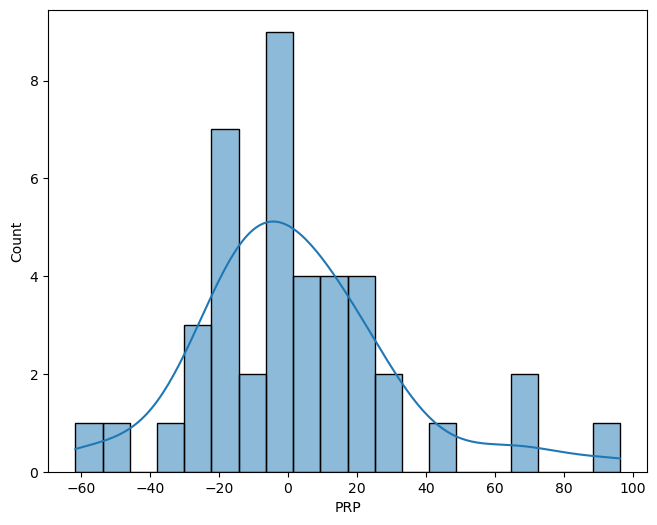

In [58]:
#ridge regression 이용
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#로드,탐색
modelset=pd.read_csv("machine.data_update.csv")
modelset.info()
modelset.dropna(inplace = True)
#전처리
dum=pd.get_dummies(modelset.VendorName,prefix='vname',dtype=float)
modelset=pd.concat([modelset.drop("VendorName",axis=1),dum],axis=1)

dum=pd.get_dummies(modelset["ModelName"],prefix='mname',dtype=float)
modelset=pd.concat([modelset.drop("ModelName",axis=1),dum],axis=1)
modelset.head()

rela=modelset.corr()["PRP"]
rela=np.abs(rela)
print(rela.sort_values(ascending=False))

#print(rela.MYCT)
num_feat=['MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX','ERP']



# 새롭게 생성된 피처 포함

x=modelset[num_feat]
y=modelset["PRP"]
x.shape,y.shape


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

train_scores = []
test_scores = []
alpha_values = [0.01, 1, 10, 100, 1000]
for a in alpha_values:
    model = Ridge(alpha=a)
    model.fit(x_train_sc, y_train)
    train_scores.append(model.score(x_train_sc, y_train))
    test_scores.append(model.score(x_test_sc, y_test))
    ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Ridge 모델 생성
ridge_model = Ridge()

# GridSearchCV 설정
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(x_train_sc, y_train)

# 최적의 alpha 값 출력
print("Best Ridge alpha:", ridge_grid.best_params_['alpha'])
    
# plt.figure(figsize=(12,6))
# plt.plot(np.log10(alpha_values), train_scores, 'r-', label='Train scores')
# plt.plot(np.log10(alpha_values), test_scores, 'b:', label='Test scores')
# plt.xlabel('Alpha value : 10^x scaled')
# plt.ylabel('Ridge Regression Score')
# plt.legend(loc='lower left')
# plt.show()

# ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
# ridge_model = Ridge()
# ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
# ridge_grid.fit(x_train_sc, y_train)
# ridge_mo = ridge_grid.best_estimator_
# print("Best Ridge alpha:", ridge_grid.best_params_['alpha'])

ridge_mo=Ridge(alpha=1)
ridge_mo.fit(x_train_sc,y_train)

cvmse=cross_val_score(ridge_mo,x_train,y_train,cv=10,scoring="neg_mean_squared_error")
cvmse=-cvmse.mean()

cvmae=cross_val_score(ridge_mo,x_train,y_train,cv=10,scoring="neg_mean_absolute_error")
cvmae=-cvmae.mean()

cvr2=cross_val_score(ridge_mo,x_train,y_train,cv=10,scoring="r2")
cvr2=cvr2.mean()
print(f"교차검증 결과- mse:{cvmse},mae:{cvmae},r2:{cvr2}")

#겁증
y_pred=ridge_mo.predict(x_train_sc)

r2_train=r2_score(y_train,y_pred)
mse_train=mean_squared_error(y_train,y_pred)
mae_train=mean_absolute_error(y_train,y_pred)

print(f"훈련데이터 검증- r2:{r2_train},mse:{mse_train},mae:{mae_train}")

y_test_pred=ridge_mo.predict(x_test_sc)


r2_test=r2_score(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
mae_test=mean_absolute_error(y_test,y_test_pred)
score=model.score(x_train_sc,y_train)
print(f"테스트 데이터 검증-r2:{r2_test},mse:{mse_test},mae:{mae_test},스코어:{score}")



#겁증
y_test_pred=ridge_mo.predict(x_test_sc)

#시각화
plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
plt.scatter(y_test,y_test_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제vs예측')
plt.show()


plt.figure(figsize=(17, 6))
plt.subplot(1,2,1)
resi=y_test-y_test_pred
sns.histplot(resi,bins=20,kde=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
PRP                        1.000000
ERP                        0.966472
MMAX                       0.863004
MMIN                       0.794931
CACH                       0.662641
                             ...   
ModelName_v8655            0.002430
ModelName_as/6650          0.002324
ModelName_50-850-ii        0.001460
ModelName_as/7000-n        0.000269
Mode

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


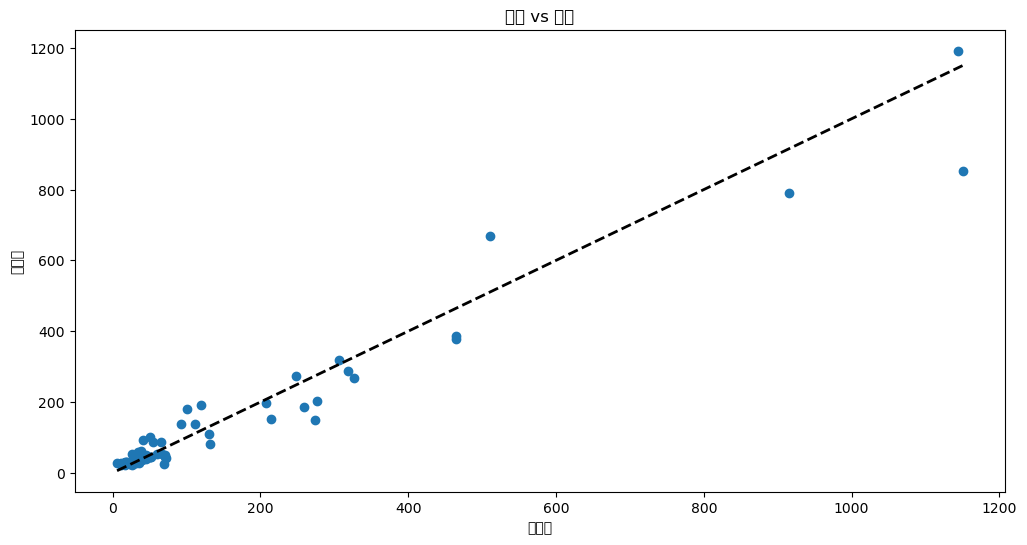

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


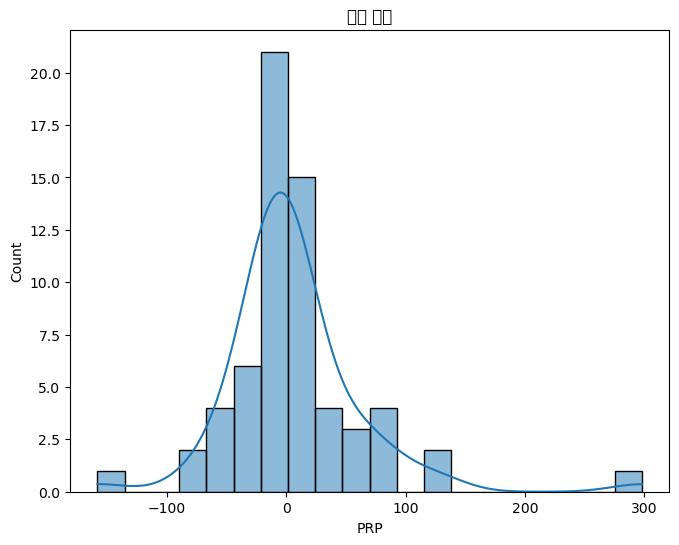

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# 데이터 로드 및 탐색
modelset = pd.read_csv("machine.data_update.csv")
modelset.info()
modelset.dropna(inplace=True)

# 원-핫 인코딩
modelset = pd.get_dummies(modelset, columns=['VendorName', 'ModelName'], drop_first=True)

# 상관관계 확인
rela = modelset.corr()["PRP"]
rela = np.abs(rela)
print(rela.sort_values(ascending=False))
num_feat=['MMIN', 'MMAX','CACH','ERP']
# 데이터 분리
X = modelset[num_feat]
y = modelset["PRP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 연속형 변수 스케일링
scaler = StandardScaler()
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns, index=X_test.index)

# 원-핫 인코딩된 변수 포함
X_train_final = pd.concat([X_train_scaled_df, X_train.select_dtypes(include=['uint8'])], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test.select_dtypes(include=['uint8'])], axis=1)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_final, y_train)

# 교차 검증
cv_mse = -cross_val_score(model, X_train_final, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print("교차 검증 MSE:", cv_mse)

cvmse=cross_val_score(model,X_train_final, y_train,cv=5,scoring="neg_mean_squared_error")
cvmse=-cvmse.mean()

cvmae=cross_val_score(model,X_train_final, y_train,cv=5,scoring="neg_mean_absolute_error")
cvmae=-cvmae.mean()

cvr2=cross_val_score(model,X_train_final, y_train,cv=5,scoring="r2")
cvr2=cvr2.mean()
print(f"교차검증 결과- mse:{cvmse},mae:{cvmae},r2:{cvr2}")


# 예측 및 평가
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"훈련 데이터 검증 - R²: {r2_train}, MSE: {mse_train}, MAE: {mae_train}")
print(f"테스트 데이터 검증 - R²: {r2_test}, MSE: {mse_test}, MAE: {mae_test}")

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제 vs 예측')
plt.show()

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
residuals = y_test - y_test_pred
sns.histplot(residuals, bins=20, kde=True)
plt.title('잔차 분포')
plt.show()
